# 유방암 환자 데이터셋을 활용한 지도학습 학습모델 평가 

In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

## 학습모델 평가 방법(Evaluation)
- Accuracy(정확도)
- Confusion Matrix(오차행렬)
- Precision(정밀도)
- Recall(재현율)
- F1 score
- ROC/AUC

## 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

유방암 환자 데이터셋 로드  
sklearn의 내장 dataset 활용 : load_breast_cancer  
target 데이터 구성 확인 :
- 1 양성종양 : 착한 종양(Positive)
- 0 악성종양 : 나쁜 종양(Negative)

In [3]:
cancer = load_breast_cancer()

In [4]:
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30)), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [10]:
# feature(X), target(y), feature_names 분리
data = cancer['data']
target = cancer['target']
feature_names=cancer['feature_names']

In [11]:
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30))

데이터 프레임으로 생성

In [12]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = cancer['target']

In [13]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
# Class Distribution: 212 - Malignant(악성), 357 - Benign(양성)
df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [15]:
df.loc[df['target']==1].shape # 양성종양-착한종양

(357, 31)

In [16]:
df.loc[df['target']==0].shape # 악성종양-나쁜종양

(212, 31)

### target 레이블 변경
- 0 양성종양 : 착한 종양(Negative)
- 1 악성종양 : 나쁜 종양(Positive)

In [17]:
# 현재 0이 악성(Malignant), 1이 양성(Benign) 이므로,
# (0을 1로, 1을 0으로) 변경하려면 각 값에 1을 뺀 후 절댓값을 취하거나 (1 - 값) 을 하면 됨
# 예: 1 - 0 = 1, 1 - 1 = 0
df['target'] = 1 - df['target']

In [18]:
df.loc[df['target']==0].shape # 양성종양-착한종양

(357, 31)

In [19]:
df.loc[df['target']==1].shape # 악성종양-나쁜종양

(212, 31)

In [20]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [21]:
original_target_names = cancer.target_names
original_target_names

array(['malignant', 'benign'], dtype='<U9')

In [22]:
# 타겟 이름 위치값 변경
original_target_names[0], original_target_names[1] = original_target_names[1], original_target_names[0]
original_target_names

array(['benign', 'malignant'], dtype='<U9')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## input 데이터 준비

In [24]:
X = df.drop('target', axis=1)   # features
y = df['target']                # target, label

In [25]:
X.shape

(569, 30)

In [26]:
y.shape

(569,)

## train, test 데이터 분할

In [27]:
# test_size = 0.25,  shuffle=True(default)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, stratify=y)

In [28]:
X_train.shape, y_train.shape

((426, 30), (426,))

In [29]:
X_test.shape, y_test.shape

((143, 30), (143,))

### 분할 데이터 클래스 분포 확인
- 데이터 분할 시 stratify=y를 한 것과 그렇지 않은 경우 비교해보기

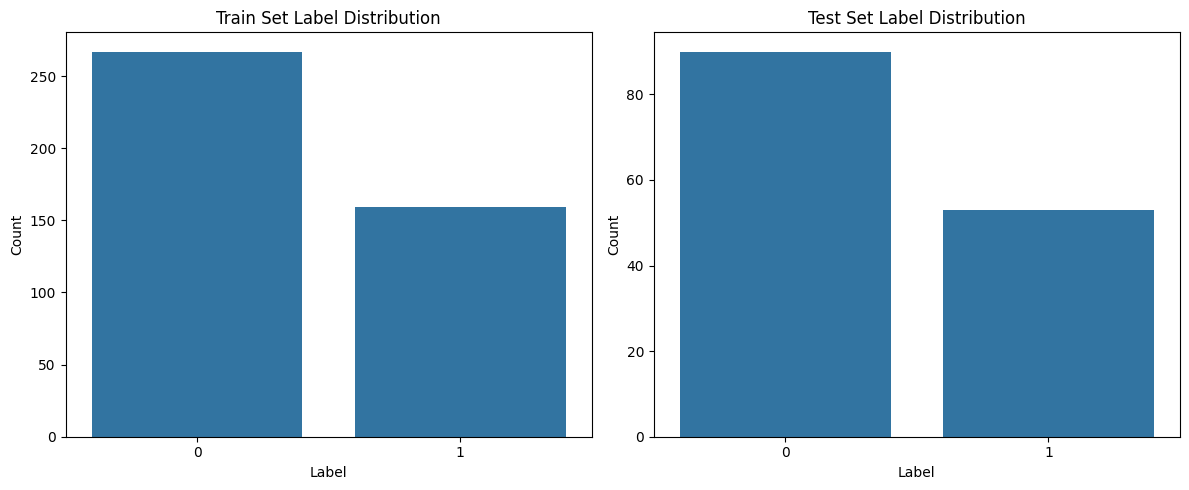

Train 분포: Counter({0: 267, 1: 159})
Test 분포: Counter({0: 90, 1: 53})


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 데이터 분포 확인용 함수
def plot_label_distribution(y_train, y_test):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # y_train 분포
    sns.countplot(x=y_train, ax=axes[0])
    axes[0].set_title('Train Set Label Distribution')
    axes[0].set_xlabel('Label')
    axes[0].set_ylabel('Count')
    
    # y_test 분포
    sns.countplot(x=y_test, ax=axes[1])
    axes[1].set_title('Test Set Label Distribution')
    axes[1].set_xlabel('Label')
    axes[1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# 사용 예시
plot_label_distribution(y_train, y_test)
print('Train 분포:', Counter(y_train))
print('Test 분포:', Counter(y_test))

## 모델 생성 및 학습

In [31]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(max_depth=5)
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

## 학습 모델 테스트

In [32]:
y_pred = model_dtc.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 성능 평가

In [33]:
print("모델의 정확도 : %.2f" % (y_pred == y_test).mean())

모델의 정확도 : 0.93


- sklearn.metrics.accuracy_score(y_true, y_pred)
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score

In [34]:
from sklearn.metrics import accuracy_score
print("모델의 정확도 : %.2f" % accuracy_score(y_test, y_pred))
#print("모델의 정확도 : %.2f" % accuracy_score(y_pred, y_test))

모델의 정확도 : 0.93


In [35]:
# 테스트 데이터(X_test)와 labels(y_test)로 모델의 정확도를 계산
print("모델의 정확도 : %.2f" % model_dtc.score(X_test, y_test))

모델의 정확도 : 0.93


### 성능평가 함수 설명
- from sklearn.metrics import classification_report
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report

In [36]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cancer.target_names))
# classification_report(y_test, y_pred) 순으로 해야함.
# 값이 바뀜.
# print(classification_report(y_pred, y_test, target_names=cancer.target_names)) 

              precision    recall  f1-score   support

      benign       0.93      0.96      0.95        90
   malignant       0.92      0.89      0.90        53

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



macro avg, weighted avg라는 값이 출력이 된다. 각각 아래와같은 의미를 가진다

- macro avg: 각 클래스에 대한 f1-score(precision, recall)를 계산한 뒤 단순한 산술 평균을 내어 값을 계산함.
  - ex)  (0.93 + 0.95) / 2 = 0.94
- weighted avg: 
  - 불균형한 데이터일 경우에 보는 수치값. 
  - 각 class에 해당하는 data의 개수에 가중치를 주어 평균을 구한 것
  - precision weighted avg : ((0.88 * 53) + (0.98 * 90))/143 = 0.94

출처: https://jaeyung1001.tistory.com/252    
출처: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report

### ROC/AUC 곡선 구하기
RoC/Auc score가 1에 가까울 수록 좋은 모델임

In [37]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc

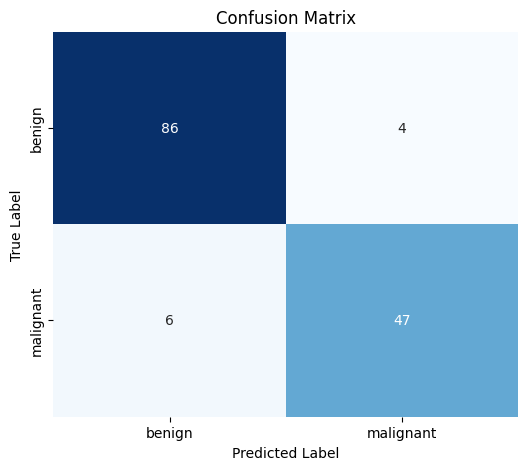

In [38]:
# 2. Confusion Matrix 계산 및 시각화
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=original_target_names,
            yticklabels=original_target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

roc_auc score :  0.9211740041928722


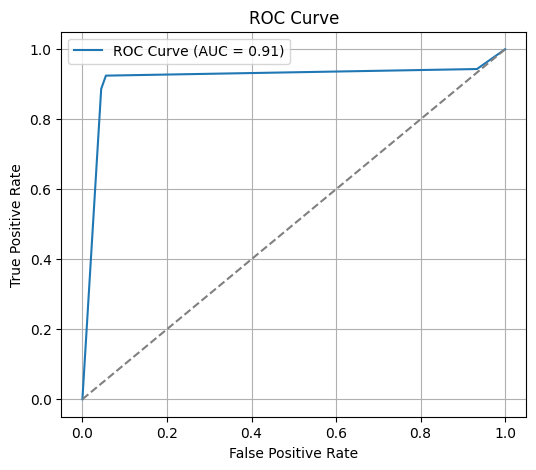

In [39]:
# ROC Curve 및 AUC 계산/그리기
# 주의: roc_curve는 확률값(probability)이 필요함.

# 만약 y_pred가 클래스(0/1)라면, 확률 예측을 따로 얻어야 함
# 예: model_dtc.predict_proba(X_test)[:, 1]
y_score = model_dtc.predict_proba(X_test)[:, 1]  # Positive 클래스(1)에 대한 확률

print("roc_auc score : ", roc_auc_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# 양성 환자로 극단적 편향을 가진 데이터로 구성

## 데이터 준비

극단적으로 데이터 표현, 다음과 같이 data 생성  
양성 환자 **357개** + 악성 환자 **5개**

In [40]:
df_neg = df.loc[df['target']==0] # 양성종양-착한종양

In [41]:
df_pog = df.loc[df['target']==1] # 악성종양-나쁜종양

In [42]:
df_neg.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


In [43]:
df_pog[:20]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,1


In [44]:
# 악성 종양 20개만 샘플링, 양성 종양에 편향된 데이터 준비
df_sample = pd.concat([df_neg, df_pog[:20]], sort=True)

In [45]:
df_sample['target'].value_counts()

target
0    357
1     20
Name: count, dtype: int64

In [46]:
X = df_sample.drop('target', axis=1)
y = df_sample['target']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, shuffle=True, stratify=y)

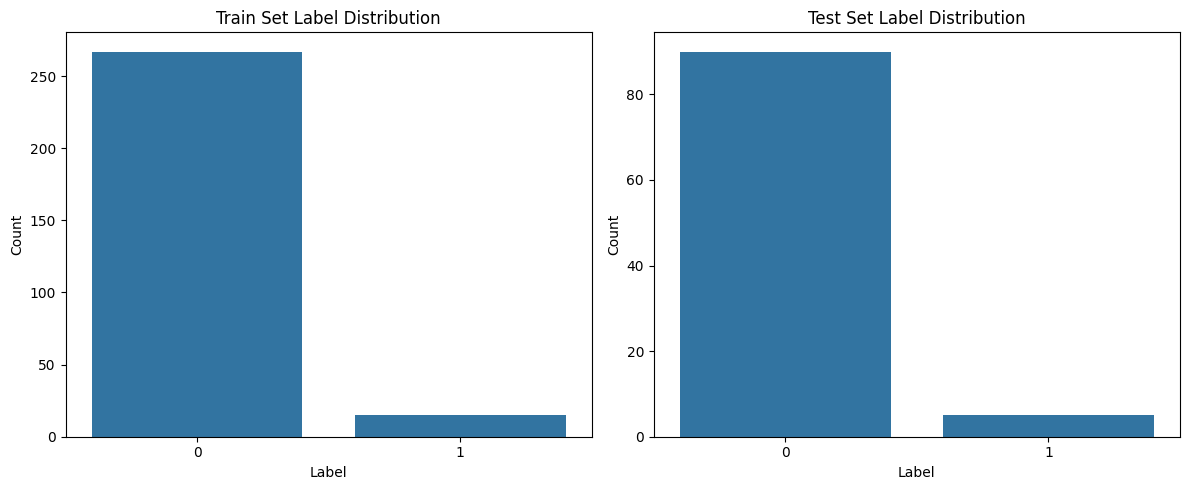

Train 분포: Counter({0: 267, 1: 15})
Test 분포: Counter({0: 90, 1: 5})


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 데이터 분포 확인용 함수
def plot_label_distribution(y_train, y_test):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # y_train 분포
    sns.countplot(x=y_train, ax=axes[0])
    axes[0].set_title('Train Set Label Distribution')
    axes[0].set_xlabel('Label')
    axes[0].set_ylabel('Count')
    
    # y_test 분포
    sns.countplot(x=y_test, ax=axes[1])
    axes[1].set_title('Test Set Label Distribution')
    axes[1].set_xlabel('Label')
    axes[1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# 사용 예시
plot_label_distribution(y_train, y_test)
print('Train 분포:', Counter(y_train))
print('Test 분포:', Counter(y_test))

## 모델 생성 및 모델 학습

In [49]:
from sklearn.tree import DecisionTreeClassifier
model_dtc2 = DecisionTreeClassifier(max_depth=5)
model_dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

## 모델 평가

In [50]:
y_pred = model_dtc2.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [51]:
accuracy_score(y_test, y_pred)

0.9578947368421052

In [52]:
pred_y = model_dtc2.predict(X_test)
# print(classification_report(y_test, y_pred, target_names=cancer.target_names))
print(classification_report(y_test, y_pred, target_names=cancer.target_names, zero_division=True))

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98        90
   malignant       0.67      0.40      0.50         5

    accuracy                           0.96        95
   macro avg       0.82      0.69      0.74        95
weighted avg       0.95      0.96      0.95        95



의사가 모든 암환자 진단을 양성으로 판단한다고 가정하면,  

In [53]:
# 모두 양성종양으로 진단하는 데이터 구성
pred_temp = np.zeros(shape=y_test.shape)
pred_temp

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
pred_temp == y_test

409     True
407     True
10     False
13     False
421     True
       ...  
348     True
234     True
278     True
445     True
382     True
Name: target, Length: 95, dtype: bool

In [55]:
(pred_temp == y_test).mean()

np.float64(0.9473684210526315)

의사가 모두 양성종양으로 진단한것과 ML 예측을 비교했을 때,  
예측률은 높으나 유능한 의사라 보기 어려움

### 정확도의 모순
- 정확도(Accuracy) : 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 자료 
- 정확도(Accuracy) = (예측 결과와 실제 데이터가 동일한 건수) / (전체 예측 데이터 건수)

정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 **위와 같은 오류**에 빠질 수 있음.

이를 보완하기 위해 나온 지표들을 살펴보자.

### confusion maxtix(오차 행렬, 혼동 행렬) 
이진 분류의 **예측 오류가 얼마인지와 어떠한 유형의 예측 오류**가 발생하고 있는지를 함께 나타내는 자료

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbKYE4M%2FbtrewgA9ioX%2F7geXmrx7gC8mAQKEFyQcgK%2Fimg.png' width="600px">

정확도(Accuracy) : 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 자료 
#### 정확도(Accuracy) = (TN+TP) / (TN+FP+FN+TP)

In [56]:
# confusion_matrix 결과 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) # (target값, 예측결과값)

array([[89,  1],
       [ 3,  2]])

FN : 악성 암인데 양성 암이라고 판단할 수 있음

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

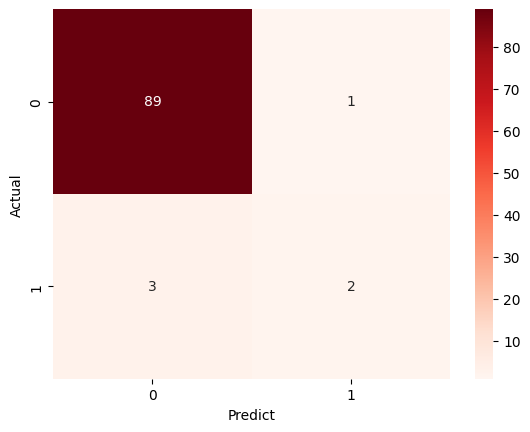

In [58]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')

plt.show()

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbKYE4M%2FbtrewgA9ioX%2F7geXmrx7gC8mAQKEFyQcgK%2Fimg.png' width='500px' align='left'>

## 정밀도(precision), 재현율(recall), f1-score

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbcl2mQ%2FbtretcGttea%2FMdaetVdrYnb2OZTEI3v8P1%2Fimg.jpg' align='left'>

불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 정확도만 가지고 판단할 경우 모델의 신뢰도가 떨어질 수 있음.  
- 정밀도와 재현율을 사용하는 것이 더욱 바람직함, 정밀도와 재현율 중 어느 것이 더 중요한지는 상황에 따라 판단 해야함.
    - 암 판단 모델과 같이 실제 Positive(악성)인 데이터를 Negative(양성)으로 잘못 판단하는 것이 큰 문제인 경우 재현율이 상대적으로 더 중요함.  
    - 스팸 메일 분류 (스팸 필터): Negative(정상 메일)을 Positive(스팸)으로 잘못 분류(FP)하면 사용자가 중요한 메일을 놓칠 수 있음. Positive(스팸)을 Negative(정상)으로 잘못 분류(FN)하는 것보다 정상 메일을 스팸으로 잘못 분류하는 FP의 비용이 더 클 수 있다. 이 경우 정밀도가 높은 모델을 선호함.

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score

## 정밀도, 재현율, f1-score

### 정밀도 (precision)
예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율.  
Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 Positive Predictive Value (PPV; 양성예측도) 라고 함.  
정밀도  = TP / (TP + FP)

In [60]:
# 정밀도 구하기
precision_score(y_test, y_pred)

0.6666666666666666

In [61]:
# 맞춘 갯수 / (맞춘 갯수+ 틀린 갯수)
3/4

0.75

### 재현율 (recall)
실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율   
정확하게 감지한 참 양성 비율, 민감도 (sensitivity) 혹은 TPR(True Positive Rate) 이라고도 함.  
재현율 = TP / (TP + FN)

In [62]:
# 재현율 구하기
recall_score(y_test, y_pred)

0.4

In [63]:
#TP/(TP+FN) : 악성암을 악성암아리고 한것/(실제 악성암인데 아니라고 한것 + 악성암을 악성암아리고 한것)
3/5

0.6

정밀도와 재현율의 trade off 관계

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcsCuPC%2FbtreoU1fkNK%2FFQjniKMtev65WSfiJxptx0%2Fimg.png' width='400px' align='center'>

[참고] 정밀도와 재현율   
https://velog.io/@sset2323/03-03.-%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80-%EC%9E%AC%ED%98%84%EC%9C%A8

정밀도와 재현율의 수치가 적절하게 조합되어 분류의 종합적인 성능 평가에 사용될 수 있는 평가 지표가 필요함.

### f1 score
정밀도와 재현율의 **조화 평균**을 나타내는 지표  
조화평균 참고 : https://www.youtube.com/watch?v=pwJ-SDyZ_3A  
조화평균 : 평균적인 변화율 계산, 공식(2ab/a+b)

$$2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$$



F1 score은 정밀도와 재현율의 조화 평균으로 정밀도와 재현율이 비슷할 수록 F1 score도 높아진다.   
0~1의 값을 가지며 일반적으로 f1 score가 높을수록 분류기 성능이 좋다고 할 수 있다.  

In [64]:
from sklearn.metrics import f1_score, roc_curve, auc

In [65]:
f1 = f1_score(y_test, y_pred)

In [66]:
print('f1 스코어: {0:.4f}'.format(f1))

f1 스코어: 0.5000


### 분류 평가 종합 report(precision, recall, f1-score 한꺼번에)

In [67]:
# classification_report() 결과 출력

# 정밀도(precision), 재현율(recall), 정확도(accuracy)
from sklearn.metrics import classification_report
# print(classification_report(y_pred, y_test))
print(classification_report(y_pred, y_test, target_names=cancer.target_names, zero_division=True))

              precision    recall  f1-score   support

      benign       0.99      0.97      0.98        92
   malignant       0.40      0.67      0.50         3

    accuracy                           0.96        95
   macro avg       0.69      0.82      0.74        95
weighted avg       0.97      0.96      0.96        95



In [68]:
# ROC/AUC 곡선 구하기
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

np.float64(0.6944444444444444)

In [69]:
# 타겟 이름 위치값 확인
original_target_names 

array(['benign', 'malignant'], dtype='<U9')

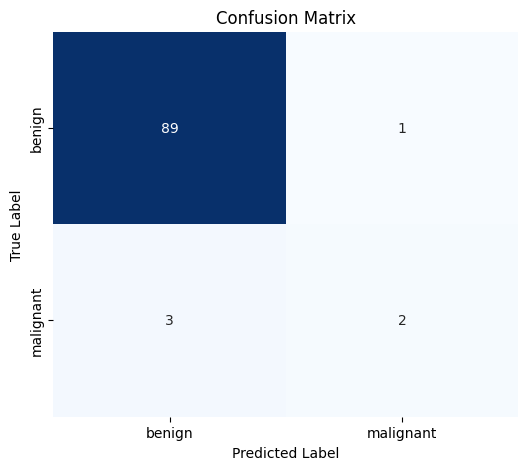

In [70]:
# roc/auc 커브
# 2. Confusion Matrix 계산 및 시각화
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=original_target_names,
            yticklabels=original_target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

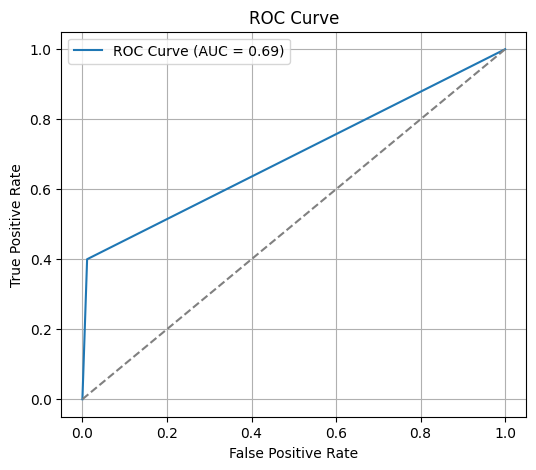

In [71]:
# 3. ROC Curve 및 AUC 계산/그리기
# 주의: roc_curve는 확률값(probability)이 필요합니다!

# 만약 y_pred가 클래스(0/1)라면, 확률 예측을 따로 얻어야 합니다.
# 예: model_dtc2.predict_proba(X_test)[:, 1]
y_score = model_dtc2.predict_proba(X_test)[:, 1]  # Positive 클래스(1)에 대한 확률

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

## freature 기여도 확인

### 편향데이터를 학습한 모델의 feature 기여도 

In [72]:
# 모델의 feature 기여도값 
model_dtc2.feature_importances_

array([0.02320695, 0.        , 0.06571785, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04694132, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.86413388, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

<Figure size 1500x800 with 0 Axes>

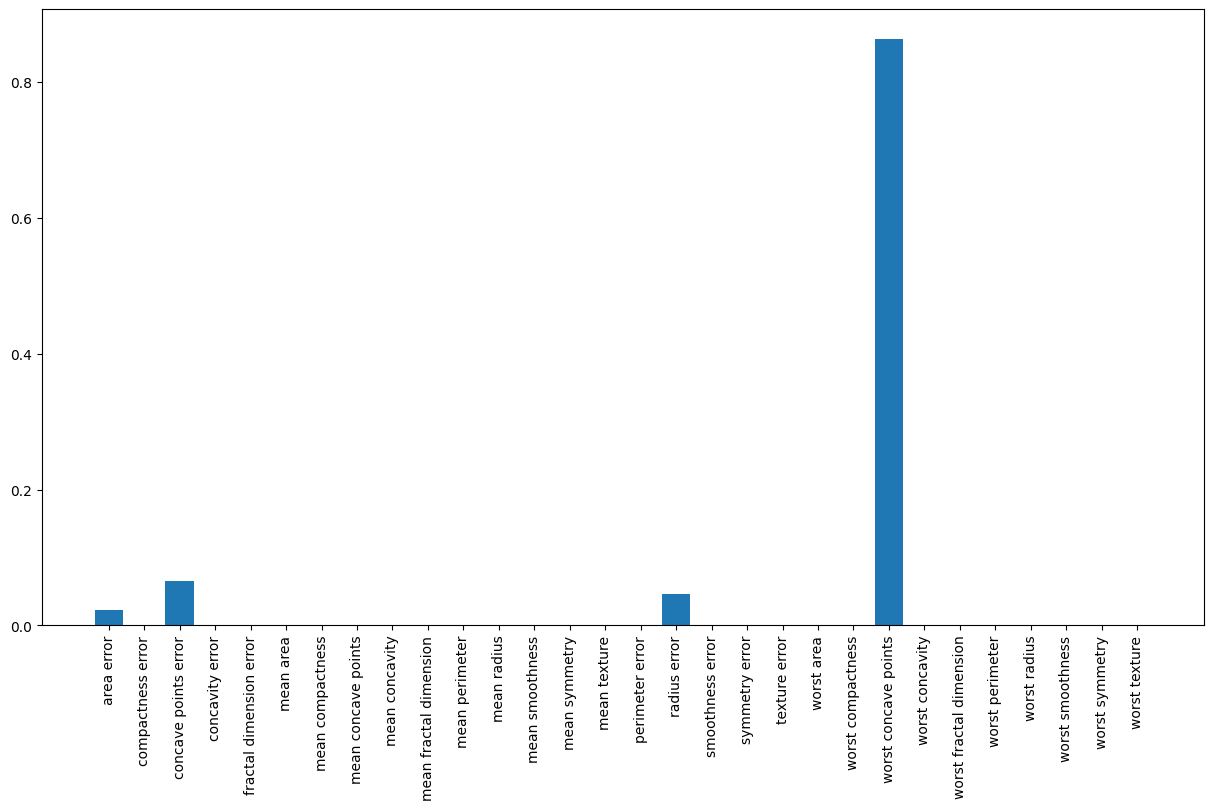

In [73]:
# 모델 학습 성능에 영향을 준 feature 확인하기
fig = plt.figure(figsize=(15,8))
fig = plt.figure(figsize=(15,8))
plt.bar(X.columns, model_dtc2.feature_importances_)
plt.xticks(rotation=90)
plt.show()

### best case의 피처 기여도

<Figure size 1500x800 with 0 Axes>

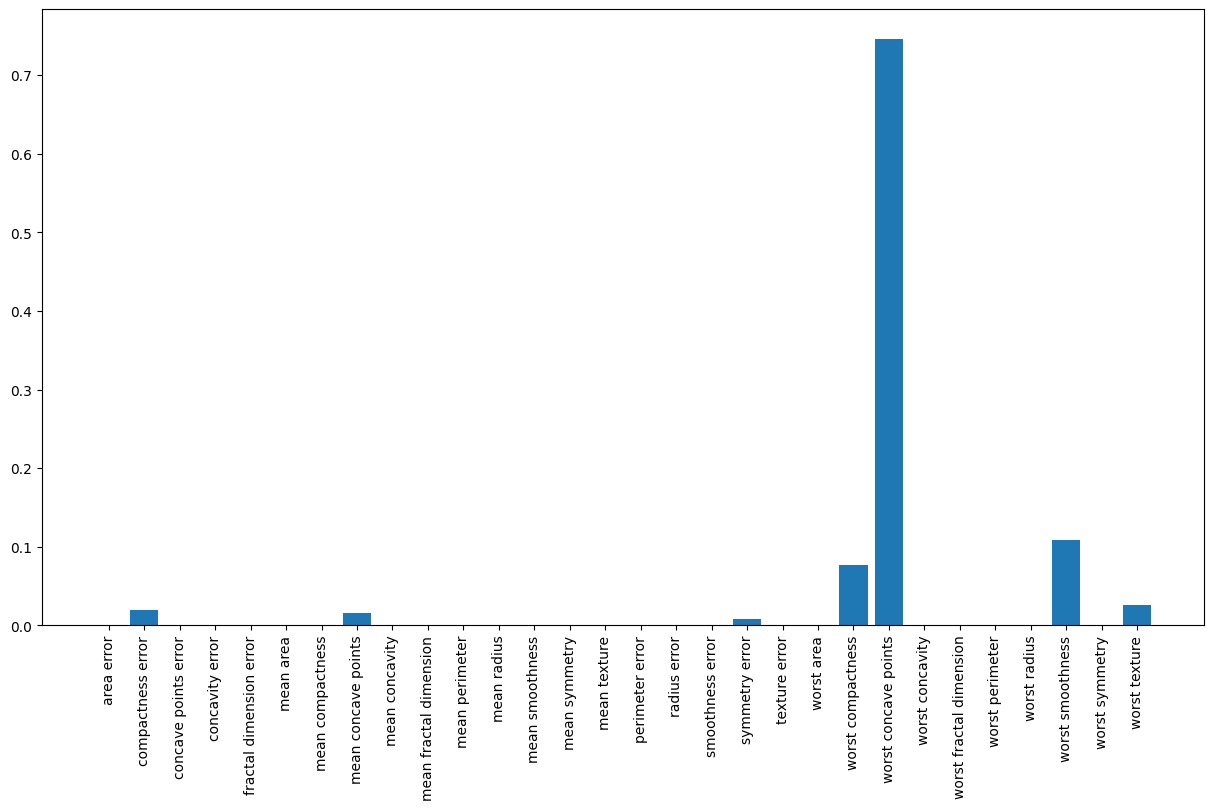

In [74]:
# 모델 학습 성능에 영향을 준 feature 확인하기
fig = plt.figure(figsize=(15,8))
fig = plt.figure(figsize=(15,8))
plt.bar(X.columns, model_dtc.feature_importances_)
plt.xticks(rotation=90)
plt.show()